In [57]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import cdecimal as dec
import re as re

In [218]:
archetypes_path = "C:\Users\Zghiru\Documents\GitHub\RC_BuildingSimulator\Justin_Semseter_Project\data\CH\Archetypes\Archetypes_properties.xlsx"

arch = pd.read_excel(archetypes_path,sheetname='THERMAL')
r = re.compile("([a-zA-Z_]+)")
m = r.match(arch["Code"][1])
arch["code1"] = pd.DataFrame([r.match(string).groups() for string in arch.Code])
arch = arch.set_index(['code1'])  
arch = arch.drop(['SERVERROOM','PARKING','SWIMMING','COOLROOM'])
arch = arch.reset_index(drop=False)
arch = arch.drop('Es',axis=1)
arch = arch.drop('Hs',axis=1)
arch = arch.drop('U_roof',axis=1)
arch = arch.drop('U_base',axis=1)

int_loads = pd.read_excel(archetypes_path,sheetname='INTERNAL_LOADS')
int_loads = int_loads.set_index(['Code'])
int_loads = int_loads['El_Wm2']
int_loads = int_loads.reset_index(drop=False)

T_sp = pd.read_excel(archetypes_path,sheetname='INDOOR_COMFORT')

b_data = arch.merge(int_loads,how='left', left_on='code1', right_on='Code')
b_data = b_data.merge(T_sp,how='left', left_on='code1', right_on='Code')
b_data = b_data.drop('code1',axis=1)
b_data = b_data.drop('Code_y',axis=1)
b_data = b_data.drop('Code',axis=1)

#Assign values for Cm from ISO13790:2008, Table 12, based on archetypes
th_mass = b_data['th_mass']
c_m = []
for i in range(0,len(th_mass)):
    if th_mass[i] == "T1":
        c_m.append(110*10**3) #Light
    elif th_mass[i] == "T2":
        c_m.append(165 * 10**3) #Medium
    elif th_mass[i] == "T3":
        c_m.append(260*10**3) #Heavy

       
#Create dictionaries for Archetypes:
lighting_load = dict(zip(b_data['Code_x'],b_data['El_Wm2']))

U_w = dict(zip(b_data['Code_x'],b_data['U_win']))
U_em = dict(zip(b_data['Code_x'],b_data['U_wall']))
c_m_A_f = dict(zip(b_data['Code_x'],c_m))

theta_int_h_set = dict(zip(b_data['Code_x'],b_data['Ths_set_C']))
theta_int_c_set  = dict(zip(b_data['Code_x'],b_data['Tcs_set_C']))

b_data_dict = b_data[['Code_x','El_Wm2','U_win','U_wall','Ths_set_C','Tcs_set_C']]
b_data_dict = b_data_dict.rename(index=str,columns={'Code_x':'Code','El_Wm2':'lighting_load','U_win':'U_w','U_wall':'U_em','Ths_set_C':'theta_int_h_set','Tcs_set_C':'theta_int_c_set'})

b_dict = b_data_dict.to_dict(orient='split')
print b_dict


{'index': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131'], 'data': [[u'MULTI_RES1', 10.5, 1.5, 0.3, 22L, 26L], [u'MULTI_RES2', 10.5, 1.5, 0.3, 22L, 26L], [u'MULTI_RES3', 10.5, 1.5, 0.3, 22L, 26L], [u'MULTI_RES4', 10.5, 1.5, 0.3, 22L,

'\n"phi_c_max_A_f": -np.inf,\n"phi_h_max_A_f":np.inf \n\ndef recurse(d):\n  if type(d)==type({}):\n    for k in d:\n      recurse(d[k])\n  else:\n    print d\n\n\n\n    }\n'

In [ ]:
# Calculations of ACH would require matching Ve_lps from b_data with the respective occupancy profile for each builing type.
ACH_vent
ACH_infl" :0.5,

theta_int_c_set : 26,
"glass_solar_transmitance" : 0.687 ,
"glass_light_transmitance" : 0.744 ,
"lighting_control" : 300,
"Lighting_Utilisation_Factor" :  0.45,
"Lighting_MaintenanceFactor" : 0.9,



"ventilation_efficiency" : 0.6 ,

}


                     drybulb_C  dewpoint_C  occupancy      Qrad
date                                                           
2013-01-01 00:00:00       -2.1        -3.1      0.000  0.000000
2013-01-01 01:00:00       -2.7        -3.4      0.000  0.000000
2013-01-01 02:00:00       -2.3        -3.4      0.000  0.000000
2013-01-01 03:00:00       -1.3        -3.7      0.000  0.000000
2013-01-01 04:00:00       -0.8        -2.6      0.000  0.000000
2013-01-01 05:00:00       -0.1        -2.5      0.000  0.000000
2013-01-01 06:00:00        0.7        -2.1      0.000  0.000000
2013-01-01 07:00:00        1.6        -1.9      0.016  0.000000
2013-01-01 08:00:00        3.9        -1.7      0.032  0.150141
2013-01-01 09:00:00        5.1        -1.0      0.032  0.279895
2013-01-01 10:00:00        6.0        -1.3      0.032  0.378627
2013-01-01 11:00:00        6.3        -0.3      0.048  0.238779
2013-01-01 12:00:00        6.7         0.5      0.048  0.173094
2013-01-01 13:00:00        6.5         1

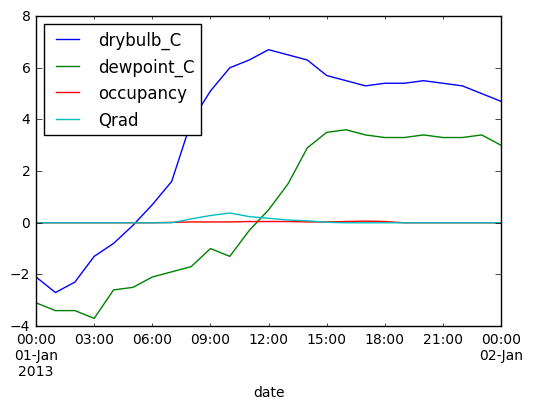

In [111]:
#epw_reader adapted from https://github.com/architecture-building-systems/CEAforArcGIS/blob/master/cea/utilities/epwreader.py

epw_labels = ['year', 'month', 'day', 'hour', 'minute', 'datasource', 'drybulb_C', 'dewpoint_C', 'relhum_percent',
                   'atmos_Pa', 'exthorrad_Whm2', 'extdirrad_Whm2', 'horirsky_Whm2', 'glohorrad_Whm2',
                   'dirnorrad_Whm2', 'difhorrad_Whm2', 'glohorillum_lux', 'dirnorillum_lux','difhorillum_lux',
                   'zenlum_lux', 'winddir_deg', 'windspd_ms', 'totskycvr_tenths', 'opaqskycvr_tenths', 'visibility_km',
                   'ceiling_hgt_m', 'presweathobs', 'presweathcodes', 'precip_wtr_mm', 'aerosol_opt_thousandths',
                   'snowdepth_cm', 'days_last_snow', 'Albedo', 'liq_precip_depth_mm', 'liq_precip_rate_Hour']

weather_path = 'C:\Users\Zghiru\Documents\GitHub\RC_BuildingSimulator\Justin_Semseter_Project\data\Zurich-Kloten_2013.epw'
occupancy_path = 'C:\Users\Zghiru\Documents\GitHub\RC_BuildingSimulator\Justin_Semseter_Project\data\Occupancy_COM.csv'
radiation_path = r'C:\Users\Zghiru\Documents\GitHub\RC_BuildingSimulator\Justin_Semseter_Project\data\radiation_Building_Zh.csv'

def epw_reader(weather_path):
    start = full_date(weather_path,1,1)
    result = pd.read_csv(weather_path, skiprows=8, header=None, names=epw_labels).drop('datasource', axis=1)
    result['dayofyear'] = pd.date_range(start, periods=8760, freq='H').dayofyear  
    result['date'] = pd.date_range(start, periods=8760, freq='H')
    #esult['ratio_diffhout'] = result['difhorrad_Whm2']/result['glohorrad_Whm2']
    result['index'] = result.index
    return result

def occupancy(occupancy_path):
    df = pd.read_csv(occupancy_path, header=0,keep_default_na=False)[:8760]
    occupancy = pd.DataFrame({'occupancy':df['People']})  
    return occupancy

def radiation(radiation_path):
    df = pd.read_csv(radiation_path,header=None)
    df = df.T
    return df

def full_date(weather_path,month,day):
    year = pd.read_csv(weather_path, skiprows=8, header=None, names=epw_labels)['year']
    return pd.datetime(year[1],month,day)

def epw_year(weather_path):
    df = epw_reader(weather_path)  
    df['date'] = pd.to_datetime(df['date'])
    return df['year'][0]

def epw_data(field = []): 
    series = epw_reader(weather_path) 
    field.insert(0,'date')
    series = series[field]
    return series 

def date_range(startdate,enddate,series):
    year = epw_year(weather_path)
    start = str(startdate)+ '/' + str(year)+' 00:00:00'
    start = pd.to_datetime(start)
    end =  str(enddate)+ '/' + str(year)+' 00:00:00'
    end = pd.to_datetime(end)

    series['index'] = series.index
    series = series.set_index(['date'],drop=False)  
    series = series[start:end]
    series = series.set_index(['index']) 
    return series

def resample(dataframe,dt):    
    if dt > 1:
        resample_value = str(dt)+'H'
    elif dt < 1:
        resample_value = str(int(dt*60))+'Min'     
    elif dt == 1:
        resample_value = '1H'
    dataframe = dataframe.set_index(['date']) #use date as index. this allows for time resampling
    dataframe = dataframe.resample(resample_value).mean()  
    dataframe = dataframe.interpolate()   
    dataframe = dataframe.reset_index(drop=False)     
    return dataframe

#================TESTING====================

occ = occupancy(occupancy_path)
occ = occ.astype('float64', raise_on_error = False) #Convert occupancy values to float
Qrad = radiation(radiation_path)

data = epw_data(['drybulb_C','dewpoint_C'])
data['occupancy'] = occ
data['Qrad'] = Qrad
data = date_range('01/01','01/02',data)
data = data.set_index(['date']) 

print data
data.plot()


In [24]:
"""
Input data
Adapted from https://github.com/architecture-building-systems/RC_BuildingSimulator/blob/master/simulator/BuildingProperties.py
"""

class building(object): 
    def __init__(self, 
                 R_env = 42,   #resistance of envelope
                 Cm    = 2.07   #capacitance of envelope
                ):
        #Single Capacitance Model Parameters
        self.Cm=Cm #[kWh/K] Room Capacitance. Default based of Madsen2011
        self.R_env=R_env #[K/kW] Wall resistance to outside air. Default based off glass having a Uvalue of 1.978W/m2K, 12m2 facade glass
        
"""
main
"""

#Simulation parameters
year = get_epw_year(weather_path)
start = '31/01/%i' %year
end =  '01/01/%i' %year

#import data
data = get_epw_data(['drybulb_C'])
temperatures = get_date_range(start,end,data)
T_out = temperatures['drybulb_C']
box = building(Cm = 2.07,R_env = 42)

#initialize conditions
dt = 0.3
temperatures = resample(temperatures,dt)
T_out = temperatures['drybulb_C']
steps = len(temperatures.index)

T_in_init = 20 #initial internal temperature
Data_Tin = []

#no heating or cooling, no internal gains, no external gains.
occ = get_occupancy(occupancy_path)
occ = occ.astype('float64', raise_on_error = False) #Convert occupancy values to float

#Qint = something * occ

Qrad = get_radiation(radiation_path)

print data



                    date  drybulb_C  index
0    2013-01-01 00:00:00       -2.1      0
1    2013-01-01 01:00:00       -2.7      1
2    2013-01-01 02:00:00       -2.3      2
3    2013-01-01 03:00:00       -1.3      3
4    2013-01-01 04:00:00       -0.8      4
5    2013-01-01 05:00:00       -0.1      5
6    2013-01-01 06:00:00        0.7      6
7    2013-01-01 07:00:00        1.6      7
8    2013-01-01 08:00:00        3.9      8
9    2013-01-01 09:00:00        5.1      9
10   2013-01-01 10:00:00        6.0     10
11   2013-01-01 11:00:00        6.3     11
12   2013-01-01 12:00:00        6.7     12
13   2013-01-01 13:00:00        6.5     13
14   2013-01-01 14:00:00        6.3     14
15   2013-01-01 15:00:00        5.7     15
16   2013-01-01 16:00:00        5.5     16
17   2013-01-01 17:00:00        5.3     17
18   2013-01-01 18:00:00        5.4     18
19   2013-01-01 19:00:00        5.4     19
20   2013-01-01 20:00:00        5.5     20
21   2013-01-01 21:00:00        5.4     21
22   2013-0

In [21]:


##differential equation parameters


#Forward Euler discretization
def FE(T_in,dt): #takes initial internal temperature as input
    Data_Tin = []
    for i in range(0,steps):
        T_in = ((T_out[i]-T_in)/(box.R_env*box.Cm))*dt + T_in
        Data_Tin.append(T_in)
    return Data_Tin

#Backward Euler discretization
def BE(T_in,dt): #takes initial internal temperature as input
    Data_Tin = []
    for i in range(0,steps):
        T_in = ((T_out[i]*dt)+(box.R_env*box.Cm*T_in))/(box.R_env*box.Cm + dt)
        Data_Tin.append(T_in)
    return Data_Tin

#Crank Nicholson discretization
def CN(T_in,dt): #takes initial internal temperature as input
    Data_Tin = []
    for i in range(0,steps):     
        T_in = ((2*T_out[i]*dt)+T_in*(2*box.R_env*box.Cm - dt))/(2*box.R_env*box.Cm +dt)
        Data_Tin.append(T_in)            
    return Data_Tin

"""
x= pd.Series(FE(T_in_init,dt))
x.plot()
plt.show
print x
"""



temperatures['T_in-FE'] = pd.Series(FE(T_in_init,dt))
temperatures['T_in-BE'] = pd.Series(BE(T_in_init,dt))
temperatures['T_in-CN'] = pd.Series(CN(T_in_init,dt))

temperatures = temperatures.set_index(['date'])


temperatures.plot()
plt.show()
print temperatures

TypeError: Empty 'DataFrame': no numeric data to plot

Abbreviations

T_out: External temperature in C extracted from an EPW weather file

T_in: Calculated internal temperature

R_env: Resistance of the envelope. Must be caluclated by hand and inputted into the Building class in BuildingProperties.py

R_infl: Equivalent resistance due to infiltration. This is calculated within BuildingProperties.py

R_vent: Equivalent resistance due to ventelation. A variable resistance calculated by the setVentelation method in within the Building class of BuildingProperties.py

Cm: Capacitance of the room. Must be caluclated by hand and inputted into the Building class in BuildingProperties.py

Q_Heat: Heat energy supplied or removed by the heater or cooler. This is determined through a controller based on the temperature set points

Q_rad: Heat energy to the sun. Hourly radiation data through the windows must be determined in advance and read through the read_transmittedR funtion of input_data.py

Q_gains: Internal heat gains of people. Determined through the occupancy profile which is read in through the read_occupancy function of input_data.py